In [160]:
import pandas as pd

df = pd.read_csv("./training_data.csv", encoding='cp1252')


df.drop(["KANAL","AIRING_23_FLG", "AIRING_456_FLG",'BESTELL_ID','WGH1_ID','WGH3_ID','WGH4_ID','DIVISION_DESC_SORT','WGH4_DESC','BEWERTUNG','FARBE'],axis=1,inplace=True)

df.head()

,OBS_ID,SHOW_ID,SHOW_DATUM,FAKTOR,WORDING_ID,BRAND_FLG,BRAND_ID,WDHL_FLG,ARTIKEL_ID,SHOW_POSITION,...,MENGE_CALL,MENGE_ECOM,WG_DESC,WGH1_DESC,WGH3_DESC,PREISKLASSE_DESC,PREIS_LABEL_DESC,GROESSE,MENGE_FREI_SHOWBEGINN,SOLD_OUT_FLG
0,235691,370117,30.07.2017 19:00:00,1,25802,1,12.0,1,399879002,20,...,NaN,0.0,Poncho,Accessoire,WGH-Stufe Marken National,"04 - 40 bis 49,99",NaN,NaN,7,1
1,235692,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890002,2,...,8.0,NaN,Langarmshirt,Shirts,WGH-Stufe Marken National,"05 - 50 bis 74,99",NaN,36,8,1
2,235693,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890003,2,...,21.0,0.0,Langarmshirt,Shirts,WGH-Stufe Marken National,"05 - 50 bis 74,99",NaN,38,23,1
3,235694,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890004,2,...,16.0,0.0,Langarmshirt,Shirts,WGH-Stufe Marken National,"05 - 50 bis 74,99",NaN,40,39,0
4,235695,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890005,2,...,13.0,9.0,Langarmshirt,Shirts,WGH-Stufe Marken National,"05 - 50 bis 74,99",NaN,42,44,0


In [161]:
df['WGH3_DESC'].replace('WGH-Stufe Eigenmarken',0,inplace=True)

df['WGH3_DESC'].replace('WGH-Stufe Marken National',1,inplace=True)


In [162]:
df['PREISKLASSE_DESC']=df['PREISKLASSE_DESC'].str[:2]

df['PREISKLASSE_DESC']=df['PREISKLASSE_DESC'].convert_objects(convert_numeric=True)

df["PREIS_DISCOUNT"] = df["PREIS_DISCOUNT"].str.replace(',', ".").astype(float)

df['PREIS_DISCOUNT'] = df['PREIS_DISCOUNT'].fillna(0)

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
df["FAKTOR"] = df["FAKTOR"].str.replace(',', ".").astype(float)

In [164]:
df['BRAND_ID'].fillna(0,inplace=True)

In [165]:
df["PREIS_LABEL_DESC"] = df["PREIS_LABEL_DESC"].astype('category')
df.dtypes
df["PREIS_LABEL_DESC"] = df["PREIS_LABEL_DESC"].cat.codes

df["WG_DESC"] = df["WG_DESC"].astype('category')
df.dtypes
df["WG_DESC"] = df["WG_DESC"].cat.codes

df["WGH1_DESC"] = df["WGH1_DESC"].astype('category')
df.dtypes
df["WGH1_DESC"] = df["WGH1_DESC"].cat.codes

df["GROESSE"] = df["GROESSE"].astype('category')
df.dtypes
df["GROESSE"] = df["GROESSE"].cat.codes

In [166]:
df.drop(['MENGE_CALL','MENGE_ECOM','SHOW_DATUM'],axis=1,inplace=True)

                         OBS_ID   SHOW_ID    FAKTOR  WORDING_ID  BRAND_FLG  \
OBS_ID                 1.000000  0.907461 -0.062878    0.133050  -0.058408   
SHOW_ID                0.907461  1.000000 -0.023201    0.165589  -0.027156   
FAKTOR                -0.062878 -0.023201  1.000000   -0.025590   0.171271   
WORDING_ID             0.133050  0.165589 -0.025590    1.000000  -0.220763   
BRAND_FLG             -0.058408 -0.027156  0.171271   -0.220763   1.000000   
BRAND_ID              -0.062440 -0.048710  0.104711   -0.228983   0.895978   
WDHL_FLG               0.044652  0.063678 -0.134173    0.006885  -0.023172   
ARTIKEL_ID             0.699787  0.795014  0.053076    0.173337   0.003009   
SHOW_POSITION         -0.005867  0.016536 -0.015779   -0.027375   0.019241   
NEW_ITEM_FLG          -0.186246 -0.070608  0.130974   -0.033335   0.061323   
ADT_FLG               -0.124640 -0.076801 -0.160440    0.039130   0.184732   
WG_ID                  0.032007 -0.019894 -0.194867    0.057354 

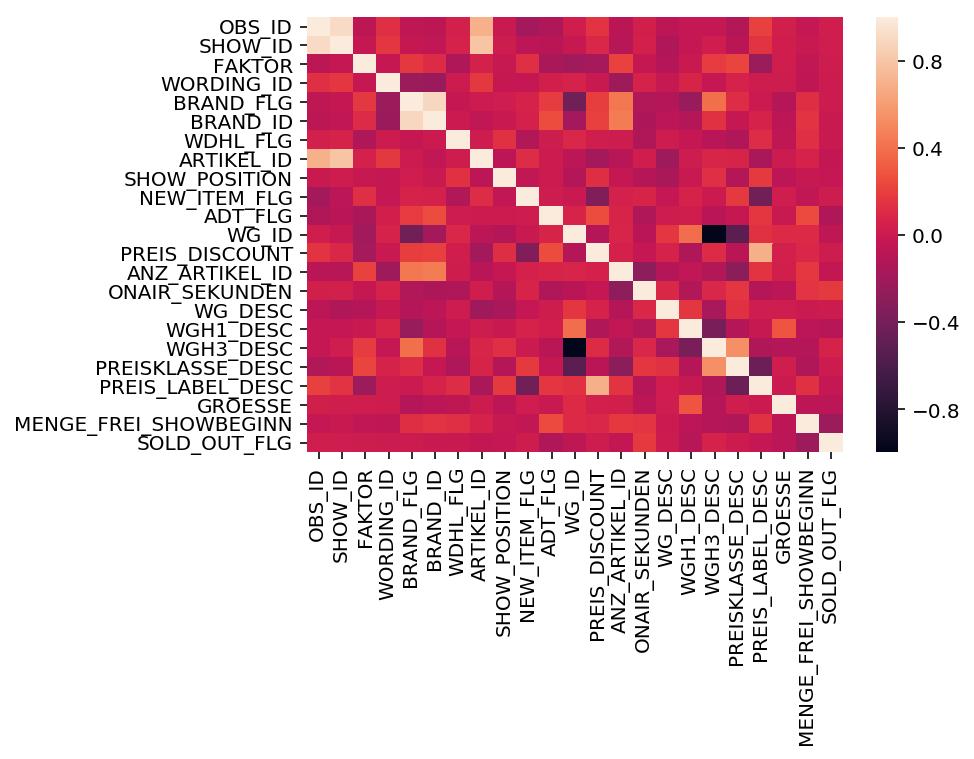

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

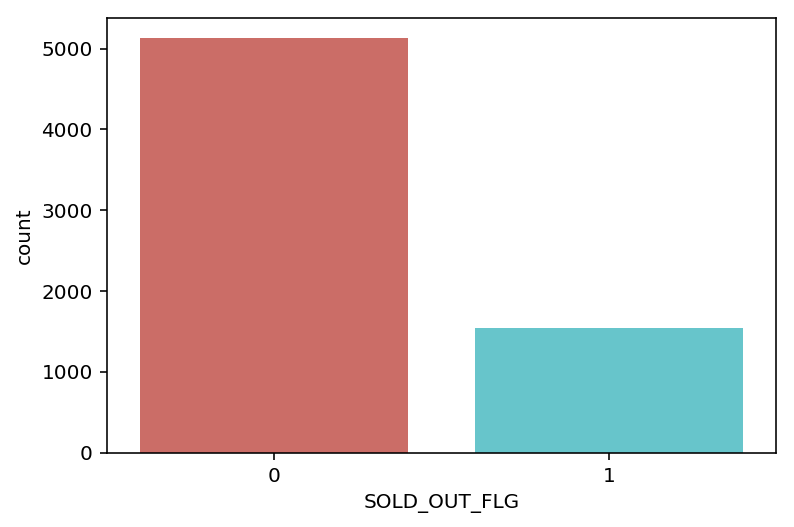

In [168]:
sns.countplot(x="SOLD_OUT_FLG",data=df,palette="hls")
plt.show()

In [169]:
df.groupby("SOLD_OUT_FLG").mean()

,OBS_ID,SHOW_ID,FAKTOR,WORDING_ID,BRAND_FLG,BRAND_ID,WDHL_FLG,ARTIKEL_ID,SHOW_POSITION,NEW_ITEM_FLG,...,PREIS_DISCOUNT,ANZ_ARTIKEL_ID,ONAIR_SEKUNDEN,WG_DESC,WGH1_DESC,WGH3_DESC,PREISKLASSE_DESC,PREIS_LABEL_DESC,GROESSE,MENGE_FREI_SHOWBEGINN
SOLD_OUT_FLG,,,,,,,,,,,,,,,,,,,,,
0,238986.971707,388739.268293,1.345385,28245.661463,0.661463,10.670049,0.015610,4.030671e+08,6.584585,0.457951,...,12.298786,222.509659,20.957268,26.447220,9.215610,0.579317,4.551610,0.660293,28.732878,63.961366
1,239136.631750,389588.234223,1.359141,28293.120364,0.666233,10.470397,0.013663,4.025664e+08,6.230969,0.478855,...,12.721171,215.299284,29.945999,26.763175,8.260247,0.648016,4.581002,0.530904,27.277163,30.171763


In [170]:
X = df[["WGH1_DESC","PREIS_LABEL_DESC", "MENGE_FREI_SHOWBEGINN","ONAIR_SEKUNDEN"]].values
y = df[["SOLD_OUT_FLG"]].values  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [171]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [172]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))
# print(model.score(X_training, y_training)) 
# shows how many percent of the dataset was predicted correctly

y_predicted = model.predict(X_test)

print(y_predicted)
print(y_test)

0.7845138055222088
[0 0 0 ... 0 0 0]
[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

[[1223   46]
 [ 313   84]]


In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.80      0.96      0.87      1269
          1       0.65      0.21      0.32       397

avg / total       0.76      0.78      0.74      1666



In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import numpy as np


scores = cross_val_score(LogisticRegression(), X, y, cv = RepeatedKFold(n_repeats = 100))

print(scores)
print(np.mean(scores))

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

[0.79294824 0.78619655 0.79054054 0.77552553 0.77102102 0.77644411
 0.78244561 0.79354354 0.79204204 0.77402402 0.78544636 0.78994749
 0.80930931 0.76276276 0.77627628 0.78394599 0.78019505 0.78678679
 0.78828829 0.77927928 0.77269317 0.78544636 0.78678679 0.79429429
 0.77702703 0.78094524 0.76969242 0.78753754 0.80255255 0.77327327
 0.80195049 0.78844711 0.76051051 0.77252252 0.78978979 0.79144786
 0.7771943  0.78303303 0.77027027 0.79054054 0.78094524 0.78019505
 0.80105105 0.76726727 0.78903904 0.78994749 0.79819955 0.78153153
 0.77702703 0.76951952 0.77794449 0.7951988  0.77252252 0.79054054
 0.77552553 0.78394599 0.76369092 0.76651652 0.79429429 0.7972973
 0.78844711 0.78769692 0.79279279 0.76051051 0.79054054 0.7951988
 0.7951988  0.78978979 0.7545045  0.77777778 0.79219805 0.76444111
 0.78078078 0.79954955 0.77852853 0.77044261 0.77494374 0.7972973
 0.80105105 0.77552553 0.78094524 0.79069767 0.77177177 0.78528529
 0.78528529 0.79369842 0.7771943  0.77327327 0.7972973  0.7717717

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

In [176]:
from sklearn.svm import SVC

model = SVC(kernel = "rbf", gamma = 0.01, C = 1)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.762905162064826


In [180]:

from sklearn.feature_selection import SelectKBest
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.preprocessing import label_binarize
from sklearn.externals import joblib

training = pd.read_csv("./training_data.csv", encoding='cp1252')
target_name="SOLD_OUT_FLG"
# label=label_binarize(df[target_name], classes=['0','1'])
# training.drop(target_name,axis=1,inplace=True)
# training[target_name]=label
training.to_csv("training_target.csv", index = False, index_label=False)

# feature = training[["MENGE_FREI_SHOWBEGINN","ONAIR_SEKUNDEN"]].values

# training = pd.read_csv("training_target.csv")
# target=training[target_name]

X = training[["MENGE_FREI_SHOWBEGINN","ONAIR_SEKUNDEN"]].values
y = training[["SOLD_OUT_FLG"]].values  

# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)


filename = 'test.csv'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

0.7773109243697479


/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
